In [1]:
from PIL import Image
from PIL import ImageDraw
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def im_to_YIQ(im):
    im_norm= im/256
    mat_a_YIQ= np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    im_yiq= np.dot(im_norm, mat_a_YIQ.T)
    return im_yiq

def yiq_coef(im, alpha, beta):
    coe= [alpha,beta,beta]
    im_yiq_coef= im*coe
    #Clampeo Y
    im_yiq_coef[:,:,0][im_yiq_coef[:,:,0]>1] = 1
    #Clampeo I
    im_yiq_coef[:,:,1][im_yiq_coef[:,:,1]>0.5957] = 0.5957
    im_yiq_coef[:,:,1][im_yiq_coef[:,:,1]<(-0.5957)] = (-0.5957)
    #Clampeo Q
    im_yiq_coef[:,:,2][im_yiq_coef[:,:,2]>0.5226] = 0.5226
    im_yiq_coef[:,:,2][im_yiq_coef[:,:,2]<(-0.5226)] =( -0.5226)
    
    return im_yiq_coef

##CORRECCIÓn

def im_to_RGB(im):
    mat_a_RGB= np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    im_RGB= np.dot(im, mat_a_RGB.T)
    im_RGB*= 255
    #Clampeo RGB
    im_RGB[im_RGB>255]= 255
    im_RGB[im_RGB<0]= 0
    
    return im_RGB.astype(np.uint8)
 
def show_two_im(a, b, text):
    im1= Image.fromarray(a)
    im2= Image.fromarray(b)
    plt.subplot(121), plt.imshow(im1)
    plt.title("Original")

    plt.subplot(122), plt.imshow(im2)
    plt.title(text)

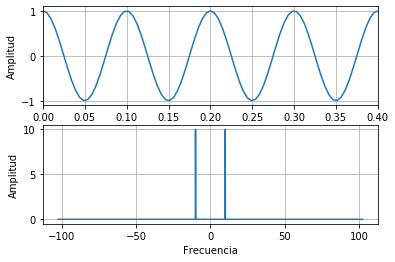

In [3]:
#Transformada de Fourier del coseno
Np= 2**12
tmin= 0
tmax= 20
f0= 10
t= np.arange(tmin,tmax, ((tmax-tmin)/Np))
y= np.cos(2*np.pi*f0*t)
Ts= t[2]-t[1]
Fs= 1/Ts
Y=np.fft.fft(y*Ts)
Y1 = np.fft.fftshift(Y)
freq= np.arange(-Fs/2,Fs/2, Fs/Np)
plt.subplot(211)
plt.plot(t, y)
#plt.xscale('Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
plt.xlim(0, 1/f0*4)
plt.grid(True)
#plt.gca().xaxis.grid(True, which='minor')  # minor grid on too

plt.subplot(212)
plt.plot(freq, abs(Y1))
#plt.yscale('Amplitud')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia')
plt.grid(True)


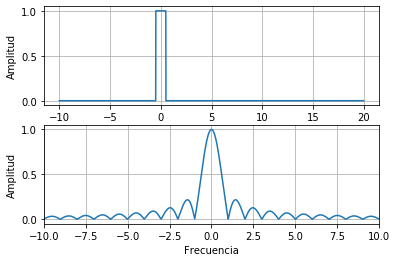

In [4]:
#Transformada de un pulso
Np= 2**12
tmin= -10
tmax= 20

t0= 3
ancho= 1
t= np.arange(tmin,tmax, ((tmax-tmin)/Np))
y= np.zeros(t.shape[0])
for i in range(y.shape[0]):
    if t[i]>-ancho/2 and t[i]<ancho/2:
        y[i]=1

Ts= t[2]-t[1]
Fs= 1/Ts
Y=np.fft.fft(y*Ts)
Y1 = np.fft.fftshift(Y)
freq= np.arange(-Fs/2,Fs/2, Fs/Np)
plt.subplot(211)
plt.plot(t, y)
#plt.xscale('Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo')
#plt.xlim(0, 1/f0*4)
plt.grid(True)
#plt.gca().xaxis.grid(True, which='minor')  # minor grid on too

plt.subplot(212)
plt.plot(freq, abs(Y1))
#plt.yscale('Amplitud')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia')
plt.xlim(-10,10)
plt.grid(True)

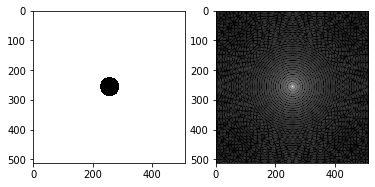

In [5]:
#Espectro de un circulo
image = Image.new('RGB', (512, 512),color=(255,255,255))
draw = ImageDraw.Draw(image)
r= 32
draw.ellipse((256-r,256-r,256+r,256+r), fill = 'black')
a_circulo= np.asarray(image)
plt.subplot(121)
plt.imshow(image)
cir_yiq= im_to_YIQ(a_circulo)
Y_cir= cir_yiq[:,:,0]
F = np.fft.fft2(Y_cir)
F = np.fft.fftshift(F)
P = np.abs(F) **2
plt.subplot(122)
plt.imshow(np.log(P+1),cmap="gray");

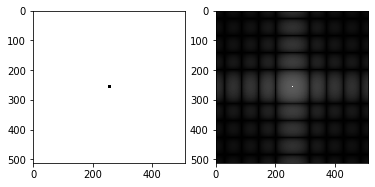

In [6]:
#Espectro de un cuadrado
im_2 = Image.new('RGB', (512, 512),color=(255,255,255))
draw_2 = ImageDraw.Draw(im_2)
r= 4
draw_2.rectangle((255-r,255-r,255+r,255+r), fill = 'black')
a_rect= np.asarray(im_2)
plt.subplot(121)
plt.imshow(im_2)
rect_yiq= im_to_YIQ(a_rect)
Y_rect= rect_yiq[:,:,0]
F = np.fft.fft2(Y_rect)
F = np.fft.fftshift(F)
P = np.abs(F)
plt.subplot(122)
plt.imshow(np.log(P+1),cmap="gray");


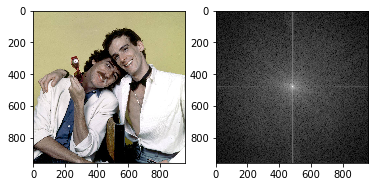

In [7]:
#Espectro de una imagen
im_3 = Image.open("spinetta.jpg")

a_3= np.asarray(im_3)
plt.subplot(121)
plt.imshow(im_3)
a3_yiq= im_to_YIQ(a_3)
Y_a3= a3_yiq[:,:,0]
F = np.fft.fft2(Y_a3)
F = np.fft.fftshift(F)
P = np.abs(F) **2
plt.subplot(122)
plt.imshow(np.log(P+1),cmap="gray");

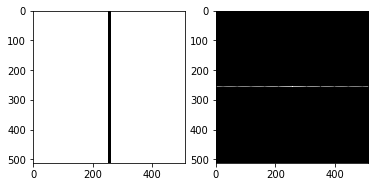

In [8]:
#Espectro de un recta
im_2 = Image.new('RGB', (512, 512),color=(255,255,255))
draw_2 = ImageDraw.Draw(im_2)
r= 20
draw_2.polygon((250,0,260,0,260,512,250,512), fill = 'black')
a_rect= np.asarray(im_2)
plt.subplot(121)
plt.imshow(im_2)
rect_yiq= im_to_YIQ(a_rect)
Y_rect= rect_yiq[:,:,0]
F = np.fft.fft2(Y_rect)
F = np.fft.fftshift(F)
P = np.abs(F)
plt.subplot(122)
plt.imshow(np.log(P+1),cmap="gray");


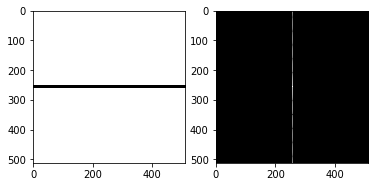

In [9]:
#Espectro de un recta
im_2 = Image.new('RGB', (512, 512),color=(255,255,255))
draw_2 = ImageDraw.Draw(im_2)
r= 20
draw_2.polygon((250,0,260,0,260,512,250,512), fill = 'black')
a_rect= np.asarray(im_2.rotate(90))
plt.subplot(121)
plt.imshow(im_2.rotate(90))
rect_yiq= im_to_YIQ(a_rect)
Y_rect= rect_yiq[:,:,0]
F = np.fft.fft2(Y_rect)
F = np.fft.fftshift(F)
P = np.abs(F)
plt.subplot(122)
plt.imshow(np.log(P+1),cmap="gray");

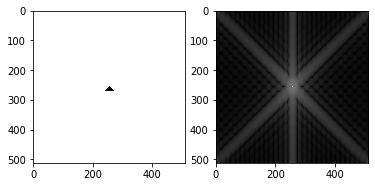

In [10]:
#Espectro de un triangulo
im_2 = Image.new('RGB', (512, 512),color=(255,255,255))
draw_2 = ImageDraw.Draw(im_2)
r= 20
draw_2.polygon((255,255,270,270,240,270), fill = 'black')
a_rect= np.asarray(im_2)
plt.subplot(121)
plt.imshow(im_2)
rect_yiq= im_to_YIQ(a_rect)
Y_rect= rect_yiq[:,:,0]
F = np.fft.fft2(Y_rect)
F = np.fft.fftshift(F)
P = np.abs(F)
plt.subplot(122)
plt.imshow(np.log(P+1),cmap="gray");

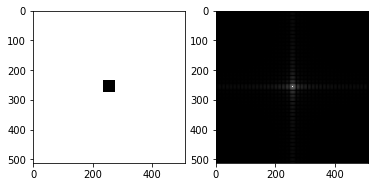

In [11]:
#Reconstrucción
im_2 = Image.new('RGB', (512, 512),color=(255,255,255))
draw_2 = ImageDraw.Draw(im_2)
r= 20
draw_2.rectangle((255-r,255-r,255+r,255+r), fill = 'black')
#im_2= Image.open("spinetta.jpg")
a_rect= np.asarray(im_2)
plt.subplot(121)
plt.imshow(im_2)
rect_yiq= im_to_YIQ(a_rect)
Y_rect= rect_yiq[:,:,0]
F = np.fft.fft2(Y_rect)
F = np.fft.fftshift(F)
Fa= np.angle(F)
Mod = np.abs(F)
fact=100
Pro_crudo =np.log(Mod/fact+1)
Pro= Pro_crudo/Pro_crudo.max()
plt.subplot(122)
plt.imshow(Pro,cmap="gray");
pro_yiq= np.zeros(rect_yiq.shape)
pro_yiq[:,:,0]= Pro
pro_rgb= im_to_RGB(pro_yiq)
im_pro= Image.fromarray(pro_rgb)
im_pro.save("pro.bmp")


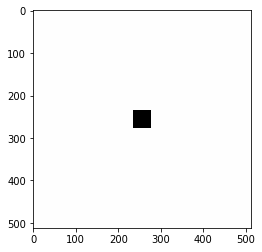

In [12]:
Mod_n= (np.exp(Pro*Pro_crudo.max())-1)*fact
# Mod_n= Pro
Re= Mod_n*np.cos(Fa)
Im= Mod_n*np.sin(Fa)
prueba= np.zeros(Y_rect.shape, dtype="complex128")
prueba.real= Re
prueba.imag= Im
f_I= np.fft.ifftshift(prueba)
I = np.fft.ifft2(f_I)
Y_nuevo= np.abs(I)
rect_yiq_p= np.zeros(a_rect.shape)
rect_yiq_p[:,:,0]= Y_nuevo

rect_rgb= im_to_RGB(rect_yiq_p)
plt.imshow(np.asarray(rect_rgb))


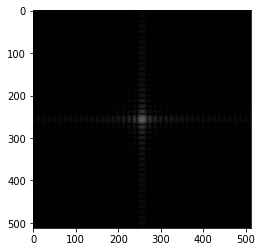

In [18]:
im_mod= Image.open("pro.bmp")
ar_mod= np.asarray(im_mod)
yiq_mod= im_to_YIQ(ar_mod)
Mod_nuevo_log= yiq_mod[:,:,0]*Pro_crudo.max()
Mod_nuevo= (np.exp(Mod_nuevo_log)-1)*fact
plt.imshow(np.log(Mod_nuevo/fact+1), cmap="gray")

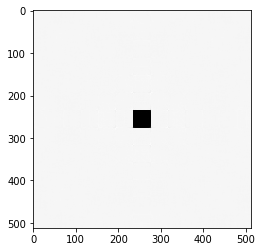

In [21]:
Re= Mod_nuevo*np.cos(Fa)
Im= Mod_nuevo*np.sin(Fa)
prueba= np.zeros(Y_rect.shape, dtype="complex128")
prueba.real= Re
prueba.imag= Im
f_I= np.fft.ifftshift(prueba)
I = np.fft.ifft2(f_I)
Y_nuevo= np.abs(I)

rect_yiq_nuevo= np.zeros(a_rect.shape)
rect_yiq_nuevo[:,:,0]= Y_nuevo
rect_rgb= im_to_RGB(rect_yiq_nuevo)
plt.imshow(np.asarray(rect_rgb))


In [22]:
# FUNCIONES
def generar_espectro(im, fact):
    im_array= np.asarray(im)
    im_yiq= im_to_YIQ(im_array)
    Y= im_yiq[:,:,0]
    F = np.fft.fft2(Y)
    F_shift = np.fft.fftshift(F)
    Fa= np.angle(F_shift)
    Mod = np.abs(F_shift)
    Pro_crudo =np.log(Mod/fact+1)
    Pro= Pro_crudo/Pro_crudo.max()
    pro_yiq= np.zeros(im_yiq.shape)
    pro_yiq[:,:,0]= Pro
    pro_rgb= im_to_RGB(pro_yiq)
    return Image.fromarray(pro_rgb), Fa, Pro_crudo.max()

def reconstruir_im(im, fact, Fa, norm):
    im_array= np.asarray(im) 
    im_yiq= im_to_YIQ(im_array)
    Mod_log= im_yiq[:,:,0]*norm
    Mod= (np.exp(Mod_log)-1)*fact
    
    Re= Mod*np.cos(Fa)
    Im= Mod*np.sin(Fa)
    pro= np.zeros( Mod_log.shape, dtype="complex128")
    pro.real= Re
    pro.imag= Im
    f_I= np.fft.ifftshift(pro)
    I = np.fft.ifft2(f_I)
    Y= np.abs(I)
    # Y_nuevo[Y_nuevo<0.01]=0
    # Y_nuevo[Y_nuevo>0.99]=1
    pro_yiq= np.zeros(im_array.shape)
    pro_yiq[:,:,0]= Y
    pro_rgb= im_to_RGB(pro_yiq)
    return Image.fromarray(pro_rgb)

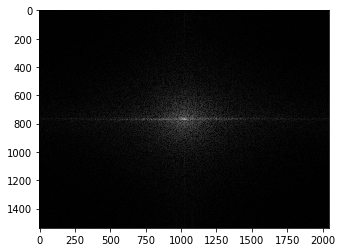

In [23]:
prueba= Image.open("prueba_04.jpg")
prueba_espect, Fase, norm= generar_espectro(prueba, 100)
plt.imshow(prueba_espect)
prueba_espect.save("prueba.bmp")

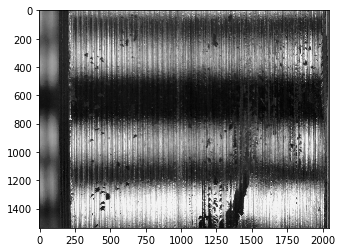

In [24]:
espect_nuevo= Image.open("prueba.bmp")
im_re= reconstruir_im(espect_nuevo, 100, Fase, norm)
plt.imshow(im_re)